Mean Squared Error: 599931015.4751557
R-squared: 0.37774014098125885


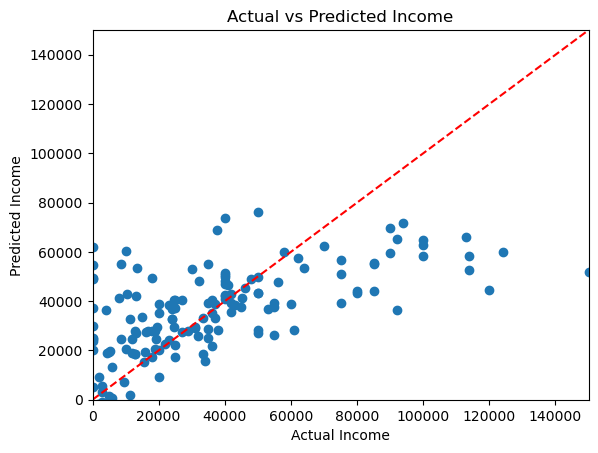

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the dataset, skip the first row as it contains headers within the data
data = pd.read_csv('data/acs.csv', skiprows=[1])

# Data Exploration and Preprocessing
# Convert certain variables to appropriate data types

# Convert age to numeric (assuming it's an integer)
data['age'] = pd.to_numeric(data['age'], errors='coerce')  # 'coerce' to handle non-numeric values

# Convert hrs_work to numeric (assuming it's an integer)
data['hrs_work'] = pd.to_numeric(data['hrs_work'], errors='coerce')  # 'coerce' to handle non-numeric values

# Replace 'employed' with a numeric value
data['employment'] = data['employment'].replace('employed', 1)

# Convert 'employment' to numeric
data['employment'] = pd.to_numeric(data['employment'], errors='coerce')  # 'coerce' to handle non-numeric values

# Handle categorical variables: race, gender, citizen, lang, married, edu, disability, birth_qrtr
categorical_cols = ['race', 'gender', 'citizen', 'lang', 'married', 'edu', 'disability', 'birth_qrtr']

# Apply one-hot encoding to categorical variables
for col in categorical_cols:
    # Fill missing values with a placeholder (e.g., 'unknown')
    data[col].fillna('unknown', inplace=True)
    
    # One-hot encode the categorical column
    encoded_cols = pd.get_dummies(data[col], prefix=col)
    
    # Drop the original categorical column from the dataframe
    data = data.drop(columns=[col])
    
    # Add the encoded columns to the dataframe
    data = pd.concat([data, encoded_cols], axis=1)

# Drop rows with missing values
data.dropna(inplace=True)

# Filter out income values greater than 150,000
data = data[data['income'] <= 150000]

# Prepare the data for regression
X = data.drop(columns=['income'])  # Features (independent variables)
y = data['income']  # Target (dependent variable)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# Plot the results
plt.scatter(y_test, predictions)
plt.xlim(0, 150000)  # Limit x-axis to income values <= 150,000
plt.ylim(0, 150000)  # Limit y-axis to predicted income values <= 150,000
plt.plot([0, 150000], [0, 150000], '--', color='red')  # Diagonal line
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income')
plt.show()

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [89]:
# Load the dataset, skip the first row as it contains headers within the data
data = pd.read_csv('data/acs.csv')
data.head()

,income,employment,hrs_work,race,age,gender,citizen,time_to_work,lang,married,edu,disability,birth_qrtr
0,60000.0,not in labor force,40.0,white,68,female,yes,NaN,english,no,college,no,jul thru sep
1,0.0,not in labor force,NaN,white,88,male,yes,NaN,english,no,hs or lower,yes,jan thru mar
2,NaN,NaN,NaN,white,12,female,yes,NaN,english,no,hs or lower,no,oct thru dec
3,0.0,not in labor force,NaN,white,17,male,yes,NaN,other,no,hs or lower,no,oct thru dec
4,0.0,not in labor force,NaN,white,77,female,yes,NaN,other,no,hs or lower,yes,jul thru sep


In [90]:
#Data Exploration and Preprocessing

#First, we take a genereal look at the columns and data, in the context of wanting to predict salary
#It is fairly reasonable to assume that the birth_qrtr column will not correlate with salary, so we will drop this.
data.drop('birth_qrtr', axis=1, inplace=True)
data.head()

,income,employment,hrs_work,race,age,gender,citizen,time_to_work,lang,married,edu,disability
0,60000.0,not in labor force,40.0,white,68,female,yes,NaN,english,no,college,no
1,0.0,not in labor force,NaN,white,88,male,yes,NaN,english,no,hs or lower,yes
2,NaN,NaN,NaN,white,12,female,yes,NaN,english,no,hs or lower,no
3,0.0,not in labor force,NaN,white,17,male,yes,NaN,other,no,hs or lower,no
4,0.0,not in labor force,NaN,white,77,female,yes,NaN,other,no,hs or lower,yes


In [91]:
#Now, before we split the data into the test, dev, and training set, we want to briefly verify that all the columns have
#enough relevant data...

for col in data.columns:
    print(col, ":", np.sum([data[col].isnull()]))
    
print(data.shape)
    
#Here, we can see that out of 2000 columns, time_to_work is missing 1217 values and hrs_work is missing 1041. 
#We consider these columns to be missing too much data and not relevant enough to make an impact, so we choose to drop these

income : 377
employment : 395
hrs_work : 1041
race : 0
age : 0
gender : 0
citizen : 0
time_to_work : 1217
lang : 105
married : 0
edu : 58
disability : 0
(2000, 12)


In [92]:
data.drop('hrs_work', axis=1, inplace=True)
data.drop('time_to_work', axis=1, inplace=True)

for col in data.columns:
    print(col, ":", np.sum([data[col].isnull()]))
    
    
data.head()

income : 377
employment : 395
race : 0
age : 0
gender : 0
citizen : 0
lang : 105
married : 0
edu : 58
disability : 0


,income,employment,race,age,gender,citizen,lang,married,edu,disability
0,60000.0,not in labor force,white,68,female,yes,english,no,college,no
1,0.0,not in labor force,white,88,male,yes,english,no,hs or lower,yes
2,NaN,NaN,white,12,female,yes,english,no,hs or lower,no
3,0.0,not in labor force,white,17,male,yes,other,no,hs or lower,no
4,0.0,not in labor force,white,77,female,yes,other,no,hs or lower,yes


In [93]:
#Now, we can reassign proper dtypes to columns

# Convert certain variables to appropriate data types

# Convert age to numeric (assuming it's an integer)
data['age'] = pd.to_numeric(data['age'], errors='coerce')  # 'coerce' to handle non-numeric values

data.head()

,income,employment,race,age,gender,citizen,lang,married,edu,disability
0,60000.0,not in labor force,white,68,female,yes,english,no,college,no
1,0.0,not in labor force,white,88,male,yes,english,no,hs or lower,yes
2,NaN,NaN,white,12,female,yes,english,no,hs or lower,no
3,0.0,not in labor force,white,17,male,yes,other,no,hs or lower,no
4,0.0,not in labor force,white,77,female,yes,other,no,hs or lower,yes


In [94]:
#Now, we can handle categorical variables using 1-hot encoding

# Handle categorical variables: race, gender, citizen, lang, married, edu, disability, birth_qrtr
categorical_cols = ['race', 'gender', 'citizen', 'lang', 'married', 'edu', 'disability', 'employment']

# Apply one-hot encoding to categorical variables
for col in categorical_cols: 
    # One-hot encode the categorical column
    encoded_cols = pd.get_dummies(data[col], prefix=col)
    
    # Drop the original categorical column from the dataframe
    data = data.drop(columns=[col])
    
    # Add the encoded columns to the dataframe
    data = pd.concat([data, encoded_cols], axis=1)
    
#Now, remove any cols with missing data before the model
data.dropna(inplace=True)

data.head()

,income,age,race_asian,race_black,race_other,race_white,gender_female,gender_male,citizen_no,citizen_yes,...,married_no,married_yes,edu_college,edu_grad,edu_hs or lower,disability_no,disability_yes,employment_employed,employment_not in labor force,employment_unemployed
0,60000.0,68,False,False,False,True,True,False,False,True,...,True,False,True,False,False,True,False,False,True,False
1,0.0,88,False,False,False,True,False,True,False,True,...,True,False,False,False,True,False,True,False,True,False
3,0.0,17,False,False,False,True,False,True,False,True,...,True,False,False,False,True,True,False,False,True,False
4,0.0,77,False,False,False,True,True,False,False,True,...,True,False,False,False,True,False,True,False,True,False
5,1700.0,35,False,False,True,False,True,False,False,True,...,False,True,False,False,True,False,True,True,False,False


In [95]:
#Now, before any further data cleanup in order to keep the data accurate, we split into
#the train, test, and dev sets

df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_dev = train_test_split(df_train, test_size=0.25, random_state=99)

total_size = len(df_train) + len(df_dev) + len(df_test)
print("train:", len(df_train), "=>", len(df_train) / total_size)
print("dev:", len(df_dev), " =>", len(df_dev) / total_size)
print("test:", len(df_test), "=>", len(df_test) / total_size)

train: 973 => 0.5995070856438693
dev: 325  => 0.2002464571780653
test: 325 => 0.2002464571780653


In [96]:
#Now, remove the target values and place them in prediction sets

# training
x_train = df_train.drop(['income'], axis=1)
y_train = pd.DataFrame(data=df_train['income'], columns=["income"])

# dev
x_dev = df_dev.drop(['income'], axis=1)
y_dev = pd.DataFrame(data=df_dev['income'], columns=["income"])

# test
x_test = df_test.drop(['income'], axis=1)
y_test = pd.DataFrame(data=df_test['income'], columns=["income"])

In [97]:
#Let's do another check to see any missing column values

for col in x_train.columns:
    print(col, ":", np.sum([x_train[col].isnull()]))

age : 0
race_asian : 0
race_black : 0
race_other : 0
race_white : 0
gender_female : 0
gender_male : 0
citizen_no : 0
citizen_yes : 0
lang_english : 0
lang_other : 0
married_no : 0
married_yes : 0
edu_college : 0
edu_grad : 0
edu_hs or lower : 0
disability_no : 0
disability_yes : 0
employment_employed : 0
employment_not in labor force : 0
employment_unemployed : 0


In [98]:
#This looks good. The only values missing before were in categorical columns. With 1-Hot encoding,
#these values will just appear false for all categories. Hopefully this does not interfere

#*****MAYBE CHECK THIS IN OFFICE HOURS TO SEE IF THIS IS OK^^^^^

In [99]:
#Now we have 3 sets ready to go.
#Note that now there are less columns, because we removed cols with missing values to fit 
#the model

print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)

(973, 21)
(325, 21)
(325, 21)


Mean Squared Error: 1800366860.6075718
R-squared: 0.33095822223789084


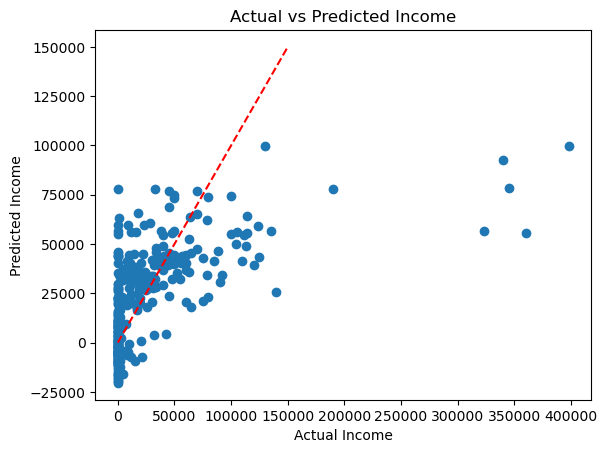

In [101]:
#Now let's prepare for the regression model.

#Instantiate the model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test data
predictions = model.predict(x_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# Plot the results
plt.scatter(y_test, predictions)
#plt.xlim(0, 150000)  # Limit x-axis to income values <= 150,000
#plt.ylim(0, 150000)  # Limit y-axis to predicted income values <= 150,000
plt.plot([0, 150000], [0, 150000], '--', color='red')  # Diagonal line
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income')
plt.show()